# Getting Started with pytorch

Our objective in this notebook is to explore the basic syntax and capabilities of pytorch.  

We'll begin our initial exploration with [this guide on their website.](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

In [1]:
import torch as t

The basic data structure of pytorch are tensors, a generalization of the matrix. We can easily create a tensor of arbitrary dimensions like so:

In [2]:
# a 5 x 3 matrix
# Values are initialized as close to 0
a = t.Tensor(5, 3)
# you can also call a.size(), but I like shape because it's like numpy
print(a.shape)
print(a)

torch.Size([5, 3])

     0.0000      0.0000      0.0000
     0.0000   2693.3750      0.0000
 58891.4375      0.0000      0.0000
     0.0000      0.0000      0.0000
  2693.1250      0.0000  58891.4375
[torch.FloatTensor of size 5x3]



In [3]:
# A single value, again randomly initalized at 0
b = t.Tensor(1)
print(b.shape)
print(b)

torch.Size([1])

 7.5556e+31
[torch.FloatTensor of size 1]



In [4]:
# pytorch support a number of different probability distribution
# we can initialize tensors from.  For example, the .rand method
# corresponds to the uniform(0, 1) continuous distribution.
# We'll also demonstrate a 3-dimensional tensor
c = t.rand(5, 3, 3)
print(c.shape)
print(c)

torch.Size([5, 3, 3])

(0 ,.,.) = 
  0.1906  0.6923  0.3568
  0.8051  0.9476  0.5538
  0.1356  0.7597  0.2526

(1 ,.,.) = 
  0.4742  0.3461  0.6248
  0.2794  0.5336  0.3662
  0.8473  0.8739  0.6530

(2 ,.,.) = 
  0.1046  0.1214  0.5831
  0.4310  0.5227  0.5204
  0.1727  0.2886  0.1058

(3 ,.,.) = 
  0.4578  0.1515  0.7608
  0.5413  0.8578  0.0200
  0.6218  0.6177  0.8051

(4 ,.,.) = 
  0.1753  0.4745  0.4696
  0.3338  0.0104  0.7270
  0.6129  0.0613  0.7346
[torch.FloatTensor of size 5x3x3]



pytorch tensors support a lot of the same methods and operations that we're used to from numpy.  For example:

In [5]:
# Initialize two tensors that we can do some ops on
x = t.rand(3, 1)
y = t.rand(1, 3)

In [6]:
# Each tensor support lots of aggreates automatically
print(x.mean(), x.std())

0.6425717274347941 0.2116652258446815


In [7]:
# It also supports the typical operations
print( x + y)


 0.6462  0.7268  0.8708
 0.9846  1.0652  1.2092
 0.5951  0.6757  0.8197
[torch.FloatTensor of size 3x3]



In [8]:
# Inplace operations
x += y

C:\Users\perus\AppData\Local\Continuum\Anaconda3\envs\torch\lib\site-packages\torch\tensor.py:309: UserWarning: other is not broadcastable to self, but they have the same number of elements.  Falling back to deprecated pointwise behavior.
  return self.add_(other)


In [9]:
# Multiplication (seems to choose beteen element-wise and matrix mul based on context)
x * y


 0.0642  0.1163  0.2093
 0.1059  0.1918  0.3451
 0.0815  0.1476  0.2655
[torch.FloatTensor of size 3x3]

In [10]:
# Transpose operation
x.t()


 0.6462  1.0652  0.8197
[torch.FloatTensor of size 1x3]

So pytorch feels just like numpy basically.  But Tensors are pytorch's only trick.  Autograd is built in to pytorch.  Let's examine an example of utilizing autograd for backprop.

In [11]:
from torch.autograd import Variable
# First, create a Variable.  This class wraps the tensor (the data) 
# of the variable, but also contains other useful information
# like its gradient.

# We'll create x and y again, but this time they will be variables
x = Variable(t.rand(5, 3), requires_grad=True)
y = x + 2

# We'll then create z, a variable that is the product of x and y
z = y * y * 3


# This represents the output of our prediction
out = z.mean()

In [12]:
# Since x, y, and z are Variables, we can ask for their gradient 
# functions. Only variables defined through operations will have 
# this.  (So y, z, and out in this case)
x.grad_fn, y.grad_fn, z.grad_fn, out.grad_fn

(None,
 <MeanBackward1 at 0x238490130b8>)

In [13]:
# Calculate our gradients.  This will find d(out)/dx
out.backward()

In [14]:
# Let's check out our gradient with respect to x
x.grad

Variable containing:
 0.9133  1.0600  1.0955
 1.0822  1.1136  0.9219
 1.0531  1.1708  1.0622
 1.1050  1.0888  0.9469
 0.8596  0.9125  0.8996
[torch.FloatTensor of size 5x3]

In [21]:
# So lets try to create a slightly more realistic example.  We'd
# like to implement gradient descent simply using pytroch

# X here is sample of 100 randomly generated data points
X = Variable(t.rand(100, 2), requires_grad=False)
# p are our parameters
p = Variable(t.rand(2), requires_grad=True)

# We need an error term for a gradient, so generate some random answers
y = Variable(t.rand(100, 1))

In [22]:
learning_rate = 1e-6
trace = []
for i in range(1, 2000):
    # Our prediction is given by
    yhat = t.matmul(X, p)

    # Then calculate loss
    error = (yhat - y).pow(2).sum()
    trace.append(int(error.data))
    # Calculate our gradients
    error.backward()

    # Update our parameters
    p.data -= (p.grad.data * learning_rate)
    
    # reset our gradients to zero
    p.grad.data.zero_()

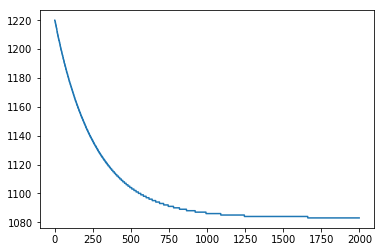

In [23]:
# We can run this for increasing iterations and see the error converge
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(trace)

And that's it!

In a typical pytorch tutorial we would now start considering the nn module that supports all of that delicious neural network code, but we're actually more interested in using pyro than neural networks for the moment.  There are also some awesome data loaders available in pytorch that we'll probably want to explore using. 